# Gráficos y Visualizaciones

## 1. Preparación de datos

### Importación de Librerías

In [2]:
# --- Importacion de librerias genéricas
import numpy as np
import pandas as pd
# --- Específicas para los gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# --- Estilo de visualizacion de matplotlib
mpl.style.use('bmh') 
# bmh es el nombre del estilo que usaremos

### Adquisición del conjunto de datos

In [3]:
# El archivo de Lluvias:
# Comparativa Enero-Febrero
df_lluvias = pd.read_csv("datasets/pune_1965_to_2002.csv")
# Ponemos como index el año, y lo reflejamos en el eje x
df_lluvias.index = df_lluvias["Year"]
df_lluvias = df_lluvias.drop("Year", axis="columns") 
print('Tamaño del df: ',df_lluvias.shape)
print('primeros registros...')
df_lluvias.head()

Tamaño del df:  (38, 12)
primeros registros...


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


## 2. Gráficas con Matplotlib

### 2.1. Gráficas de linea

#### Gráficas elementales

Gráficos de linea:


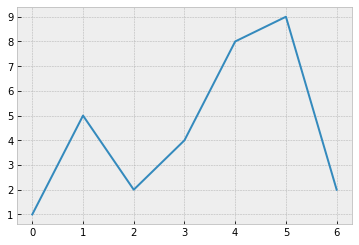

In [4]:
print('Gráficos de linea:')
fig, ax = plt.subplots()
ax.plot([1, 5, 2, 4, 8, 9, 2])

#### Graficas compuestas

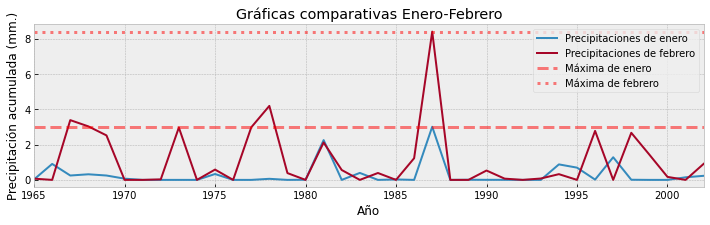

In [5]:
fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()
ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5, linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')
# Etiqueta eje x
ax.set_xlabel('Año')                          
# Etiqueta eje y
ax.set_ylabel('Precipitación acumulada (mm.)')      
# Título
ax.set_title('Gráficas comparativas Enero-Febrero')     
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend()    

### 2.2. Subplot

Separar en gráficas para una visualización menos recargada

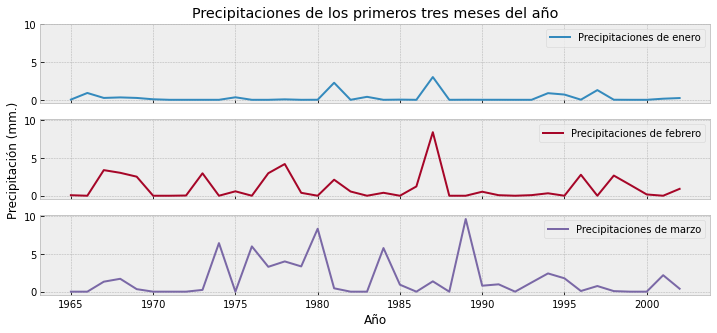

In [6]:
# Preparando los gráficos
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
# Títulos y ejes
ax[0].set_title('Precipitaciones de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Precipitación (mm.)')  
# Leyendas
ax[0].legend()  
ax[1].legend()
ax[2].legend()

### 2.3. Subplots matriciales

Separar en gráficas matricialmente

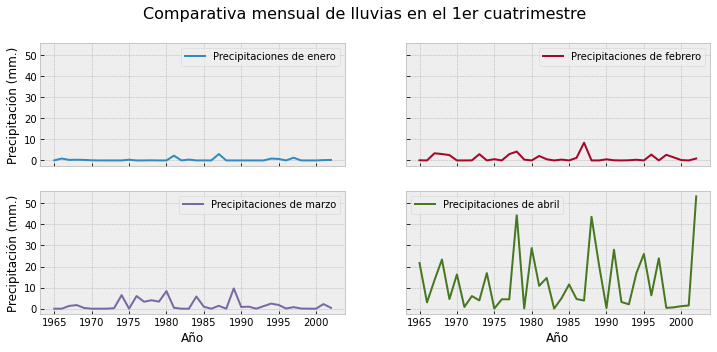

In [7]:
# Preparando los gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex='col', sharey=True)  
ax[0,0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[0,1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[1,0].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
ax[1,1].plot(df_lluvias.index, df_lluvias['Apr'], label='Precipitaciones de abril', color='C3')
# Títulos y ejes
fig.suptitle('Comparativa mensual de lluvias en el 1er cuatrimestre',fontsize=16)
ax[0,0].set_ylabel('Precipitación (mm.)')  
ax[1,0].set_ylabel('Precipitación (mm.)')  
ax[1,0].set_xlabel('Año')  
ax[1,1].set_xlabel('Año')  
# Leyendas
ax[0,0].legend()  
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

<b>Observaciones:</b><br>
    - fig.suptitle permite presentar un título general<br>
    - sharex='col' comparte el eje x por columna<br>
    - sharey=True comparte el eje y. Esto es mejor que sharey='row' ya que mantiene
      la proporcion


### 2.5. Gráficas de Puntos (Scatter)

Text(0, 0.5, 'Peso (kg.)')

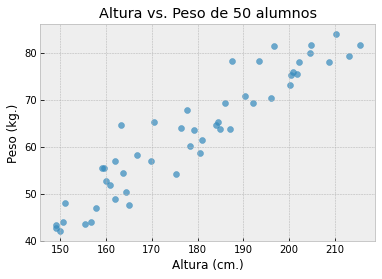

In [8]:
pesos = [42.8, 43.3, 42. , 44. , 44.1, 43.5, 48.1, 48.9, 47.7,46.9,50.4,
       52.7, 51.8, 54.5, 54.2, 56.9, 55.4, 55.5, 57.1, 58.3, 63.7, 58.8,
       64.6, 60.2, 64. , 63.8, 61.4, 65.3, 64.7, 63.8, 69.3, 67.9, 65.2,
       70.8, 70.5, 69.3, 75.3, 75.5, 78.2, 78. , 73.2, 78. , 80.1, 78.2,
       76. , 81.5, 79.4, 81.8, 81.8, 84.1]
alturas = [149. , 149. , 149.9, 156.8, 150.6, 155.4, 151. , 162. , 165.,
       157.8, 164.4, 160.1, 160.8, 163.8, 175.2, 162. , 159.5, 159.2,
       169.8, 166.7, 179.2, 180.6, 163.3, 178.3, 176.3, 184.8, 181. ,
       170.5, 184.1, 187.1, 186.1, 177.7, 184.5, 190.3, 196. , 192.1,
       200.4, 201.8, 187.5, 202.1, 200.3, 208.8, 204.6, 193.5, 200.9,
       196.8, 213.1, 204.8, 215.5, 210.2] 
fig, ax = plt.subplots()
ax.scatter(alturas, pesos, alpha=0.7)
ax.set_title('Altura vs. Peso de 50 alumnos')
ax.set_xlabel('Altura (cm.)')
ax.set_ylabel('Peso (kg.)')

### 2.6. Puntos: Comparativas

Scatter comparativas


Text(0, 0.5, 'Precipitaciones en Septiembre (mm.)')

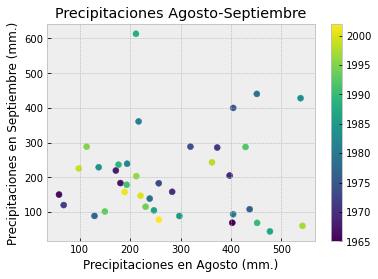

In [9]:
print('Scatter comparativas')
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
fig.colorbar(mapeo_colores)         # Se añade la barra de colores
ax.set_title('Precipitaciones Agosto-Septiembre')
ax.set_xlabel('Precipitaciones en Agosto (mm.)')
ax.set_ylabel('Precipitaciones en Septiembre (mm.)')

### 2.8. Gráficas de Barras

Gráficos de Barras
Lluvias acumuladas:
Jan       11.186
Feb       41.843
Mar       63.733
Apr      470.487
May      952.272
Jun    12809.663
Jul    16340.395
Aug    10529.357
Sep     7642.245
Oct     2783.320
Nov      958.492
Dec      230.646
dtype: float64


Text(0.5, 0, 'Mes')

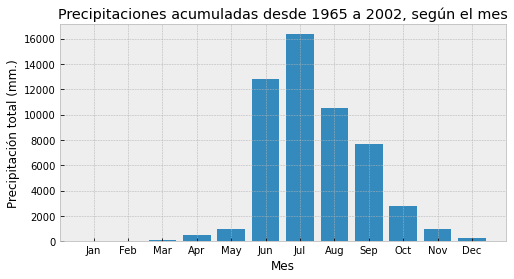

In [10]:
print('Gráficos de Barras')
precipitaciones_acumuladas = df_lluvias.sum()
print('Lluvias acumuladas:')
print(precipitaciones_acumuladas)
fig, ax = plt.subplots(figsize=(8,4))
precipitaciones_acumuladas = df_lluvias.sum()
ax.bar(df_lluvias.columns, precipitaciones_acumuladas)
ax.set_title('Precipitaciones acumuladas desde 1965 a 2002, según el mes')
ax.set_ylabel('Precipitación total (mm.)')
ax.set_xlabel('Mes')

### 2.9. Histogramas de Frecuencias

Histogramas de frecuencias:


Text(0, 0.5, 'Frecuencia absoluta')

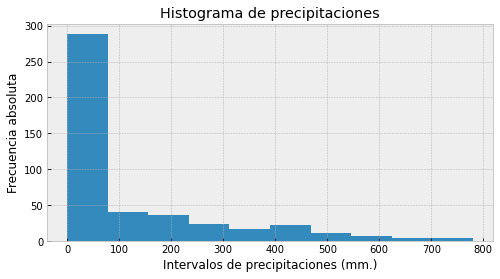

In [11]:
print('Histogramas de frecuencias:')
df_lluvias.values.flatten()
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_lluvias.values.flatten(), bins=10)
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

### 2.10. Enriquecimiento de gráficas

Enriqueciendo graficas


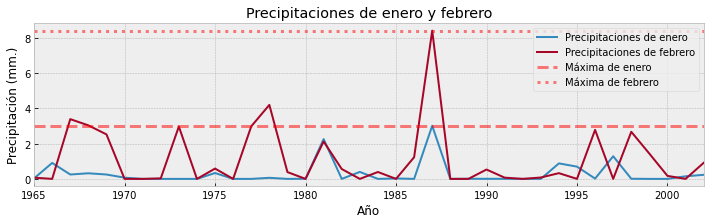

In [12]:
print('Enriqueciendo graficas')
fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
# Calculo de maximos
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()
ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')
ax.set_xlabel('Año')  
ax.set_ylabel('Precipitación (mm.)') 
ax.set_title('Precipitaciones de enero y febrero')     
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend() 

### 2.11. Diagramas Caja-Bigote (Boxplot)

<b>La Caja:</b><br>
Estos diagramas encierran en la caja central al 50% de los valores centrales. Los extremos de arriba y abajo de la caja indican los cuantiles, o percentiles, 25 y 75. Por fuera de los bigotes se observan los outlier. La línea central dentro de la caja representa a la mediana.<br>
<b>Los bigotes:</b><br>
Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza esperada de los datos. Estos bigotes se extienden 1,5 veces el IQR desde los extremos superior e inferior de la caja. Si los datos no llegan hasta el final de los bigotes, estos se ajustan a los valores mínimo y máximo de los datos. <br>
<b>Los bigotes:</b><br>
Si hay datos que queden por encima o por debajo de los extremos de los bigotes, se los representa con puntos. Estos puntos se conocen como valores atípicos. Un valor atípico es el que supera la varianza esperada. 

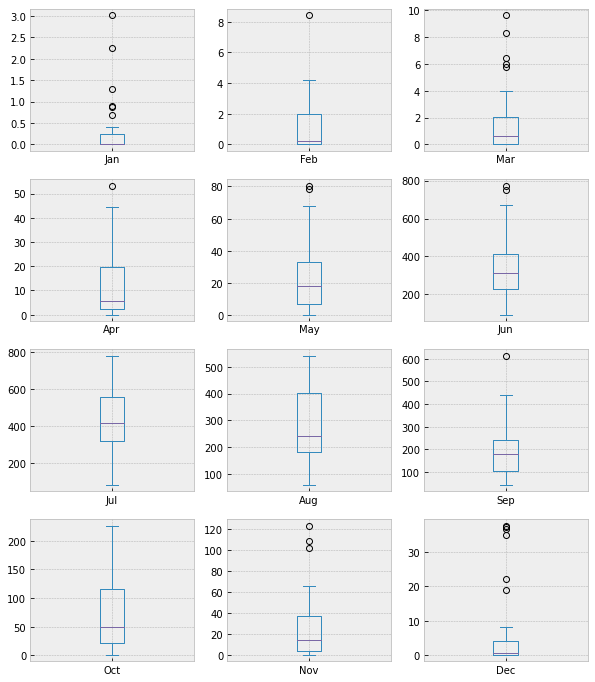

In [23]:
df_lluvias.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(10,12))
plt.show()

## 3. Seaborn

Introduccion al uso de Seaborn

### 3.1. El dataset

In [12]:
sns.set()
"""
Este método sobreescribe los parámetros internos de Matplotlib para que utilice
el estilo de Seaborn.
"""
# Un dataset ejemplo dentro de la librería Seaborn
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
print(df_ejercicio.head())
print('tamaño: ',df_ejercicio.shape)


   id     diet  pulse    time  kind
0   1  low fat     85   1 min  rest
1   1  low fat     85  15 min  rest
2   1  low fat     88  30 min  rest
3   2  low fat     90   1 min  rest
4   2  low fat     92  15 min  rest
tamaño:  (90, 5)


### 3.2. Gráficas Seaborn

#### Distplot (Gráficas de distribución)

Distribución de frecuencia cardíaca por tipo de actividad


<Figure size 432x288 with 0 Axes>

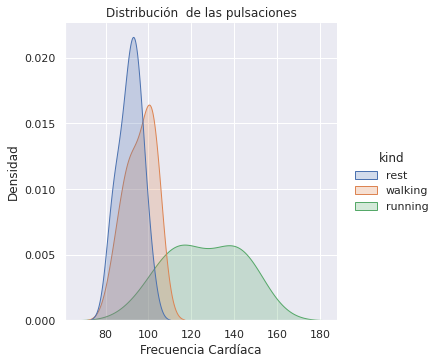

In [13]:
plt.figure()
print('Distribución de frecuencia cardíaca por tipo de actividad')
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')
# El conjunto de datos contiene mediciones de la frecuencia cardíaca de 30 personas distintas tras realizar un determinado tipo de ejercicio. Las columnas son:
# id: el id de la persona sobre la cual se efectuó la medición.
# diet: dieta de dicha persona (baja en grasas o sin grasas).
# pulse: la frecuencia cardíaca obtenida (en pulsaciones por minuto).
# time: tiempo transcurrido tras el inicio del ejercicio.
# kind: tipo de ejercicio (en reposo, caminando o corriendo).

Distribución de frecuencia cardíaca por tipo de dieta


<Figure size 432x288 with 0 Axes>

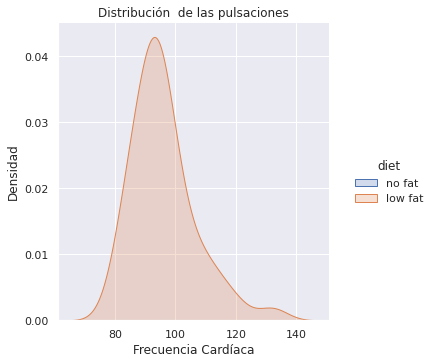

In [14]:
print('Distribución de frecuencia cardíaca por tipo de dieta')
plt.figure()
df_low_fat = df_ejercicio[df_ejercicio['diet'] == 'low fat']
ax = sns.displot(data=df_low_fat, x='pulse', kind='kde', hue='diet', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

#### Catplot

Frecuencia cardíaca por tipo de dieta


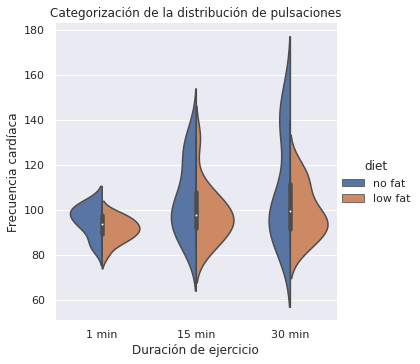

In [15]:
print('Frecuencia cardíaca por tipo de dieta')
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')

#### Otras gráficas con Seaborn

Dataset de Propinas

In [16]:
# Dataset de Propinas
print('Análisis de propinas:')
# importamos dataset
df_propinas = sns.load_dataset('tips')
print(df_propinas.head())
print(df_propinas.shape)

Análisis de propinas:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)


#### Implot

Inplot: Gráfica de puntos


/home/jorgek/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


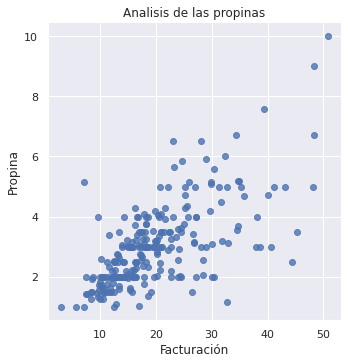

In [17]:
# Uso de Implot
print('Inplot: Gráfica de puntos')
ax=sns.lmplot('total_bill', 'tip', data=df_propinas, fit_reg=False)
ax.set(xlabel='Facturación', ylabel='Propina', title='Analisis de las propinas')

##### Incluye recta de tendencias (fit_reg)

Gráfica de puntos con línea de tendencia


/home/jorgek/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


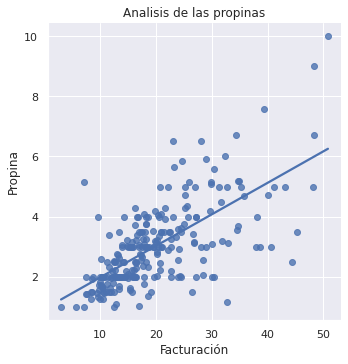

In [18]:
# Fit reg: muestra recta de tendencias
print('Gráfica de puntos con línea de tendencia')
ax=sns.lmplot('total_bill', 'tip', data=df_propinas, ci=None, fit_reg=True)
ax.set(xlabel='Facturación', ylabel='Propina', title='Analisis de las propinas')

##### Incluye banda de confianza

Gráfica de puntos con línea de tendencia con banda o intervalo de confianza


/home/jorgek/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


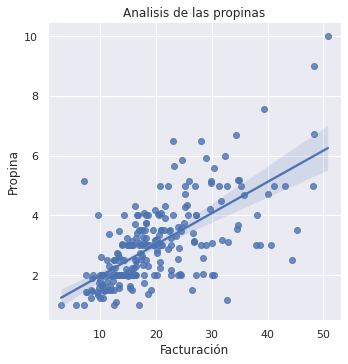

In [35]:
print('Gráfica de puntos con línea de tendencia con banda o intervalo de confianza')
ax=sns.lmplot('total_bill', 'tip', data=df_propinas, fit_reg=True)
ax.set(xlabel='Facturación', ylabel='Propina', title='Analisis de las propinas')